In [6]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp

### Slope Fields  

$y' = (x - 2) * (y + 1)$    
Initial value: $y(1) = 0.5$

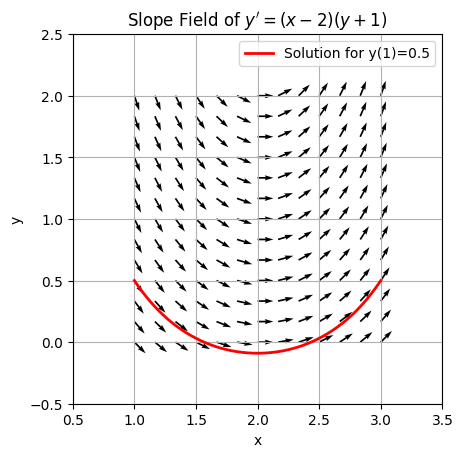

In [24]:
def f(x, y):
    return (x - 2) * (y + 1)

n = 13
x = np.linspace(1, 3, n)
y = np.linspace(0, 2, n)
X, Y = np.meshgrid(x, y)
# Initial value y(1) = 0.5
x0 = 1
y0 = 0.5
# Berechnen der Steigung an jedem Punkt
U = np.ones_like(X)  # Delta x ist immer 1 für die Richtungsfeldpfeile
V = f(X, Y)

# Normalisieren der Pfeile für einheitliche Länge
N = np.sqrt(U**2 + V**2)
U = U / N
V = V / N

x_eval = np.linspace(1, 3, 300)
# solve initial value problem
sol = solve_ivp(
    f,
    (1, 3),
    [y0],
    t_eval=x_eval
)

# Die Skalierung überlassen wir jetzt der Quiver-Funktion,
# da sich die Pfeile sonst überlappen
plt.quiver(X, Y, U, V, angles="xy", scale_units="xy")
plt.plot(sol.t, sol.y[0], 'r', linewidth=2, label="Solution for y(1)=0.5")
plt.gca().set_aspect("equal")
plt.xlim(x.min() - 0.5, x.max() + 0.5)
plt.ylim(y.min() - 0.5, y.max() + 0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.title(r"Slope Field of $y' = (x - 2)(y + 1)$")
plt.grid(True)
plt.legend()
plt.show()

### Phase Space  

In [18]:

# Parameter
beta = 0.3
gamma = 0.1
alpha = 0.002

def sir_cycle(t, y):
    s, i, r = y
    ds = -beta*s*i + alpha*r
    di = beta*s*i - gamma*i
    dr = gamma*i - alpha*r
    return [ds, di, dr]

# Anfangszustand
y0 = [0.99, 0.01, 0.0]

t = np.linspace(0, 5000, 20000)
sol = solve_ivp(sir_cycle, (t[0], t[-1]), y0, t_eval=t)

s, i, r = sol.y


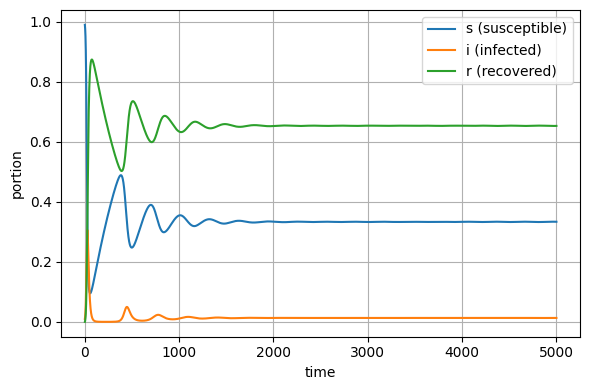

In [25]:
plt.figure(figsize=(6,4))
plt.plot(t, s, label="s (susceptible)")
plt.plot(t, i, label="i (infected)")
plt.plot(t, r, label="r (recovered)")
plt.xlabel("time")
plt.ylabel("portion")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

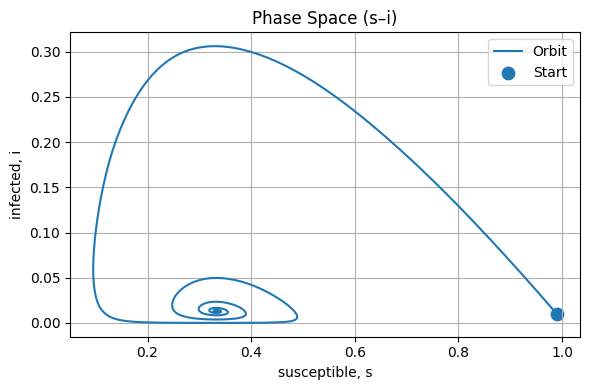

In [26]:
plt.figure(figsize=(6,4))
plt.plot(s, i, label="Orbit")
plt.scatter(s[0], i[0], s=80, label="Start")

plt.xlabel("susceptible, s")
plt.ylabel("infected, i")
plt.title("Phase Space (s–i)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### Phase Portrait  